/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 80600367104.0000 - val_loss: 62499954688.0000
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 80600358912.0000 - val_loss: 62499954688.0000
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 80600350720.0000 - val_loss: 62499954688.0000
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 80600350720.0000 - val_loss: 62499946496.0000
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 80600334336.0000 - val_loss: 62499946496.0000
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 80600326144.0000 - val_loss: 62499946496.0000
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 80600326144.0000 - val_loss: 62499946496.0000
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 80600317952.0000 - val_loss: 62499946496.0000
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 80600317952.0000 - val_loss: 62499946496.0000
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 

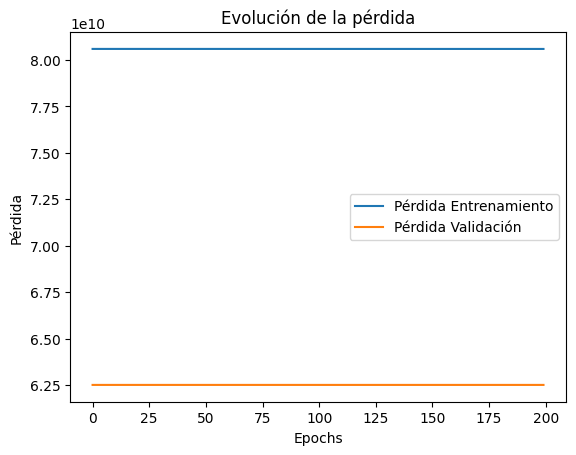

In [ ]:
# Red neuronal artificial con una capa oculta de 10 neuronas.
# Predecir el precio de una vivienda en función de sus características.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 #  carga de datos y preprocesamiento
datos = pd.DataFrame({
    'superficie': [100, 80, 120, 70, 90],
    'habitaciones': [3, 2, 4, 2, 3],
    'antiguedad': [10, 20, 5, 25, 15],
    'precio': [300000, 200000, 400000, 180000, 250000]
})

X = datos.drop('precio', axis=1)
y = datos['precio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Creacion del modelo
modelo = Sequential()
modelo.add(Dense(10, input_dim=3, activation='relu'))
modelo.add(Dense(1))
modelo.compile(optimizer='adam', loss='mean_squared_error')
historia = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

# Grafica de perdida

plt.plot(historia.history['loss'], label='Pérdida Entrenamiento')
plt.plot(historia.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()
plt.show()